# Задача №19
Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием метода "Mean Normalisation".

## Загрузка и первичный анализ данных

Используем данные из соревнования [Cardiovascular Disease dataset.](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Будем использовать только обучающую выборку
df = pd.read_excel('../Lab2/ALF_Data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     8785 non-null   int64  
 1   Gender                  8785 non-null   object 
 2   Region                  8785 non-null   object 
 3   Weight                  8591 non-null   float64
 4   Height                  8594 non-null   float64
 5   Body Mass Index         8495 non-null   float64
 6   Obesity                 8495 non-null   float64
 7   Waist                   8471 non-null   float64
 8   Maximum Blood Pressure  8481 non-null   float64
 9   Minimum Blood Pressure  8409 non-null   float64
 10  Good Cholesterol        8768 non-null   float64
 11  Bad Cholesterol         8767 non-null   float64
 12  Total Cholesterol       8769 non-null   float64
 13  Dyslipidemia            8785 non-null   int64  
 14  PVD                     8785 non-null   

# Выбрать числовые признаки "Height" и "Weight"

In [3]:
col = pd.DataFrame(df, columns=["Height","Weight"])
col.head()

,Height,Weight
0,162.1,56.0
1,162.2,60.2
2,162.5,83.9
3,160.5,69.4
4,159.2,73.1


<AxesSubplot:>

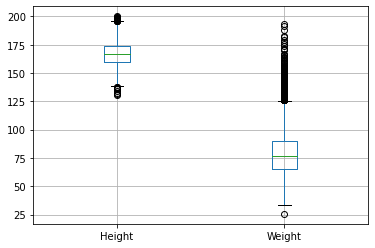

In [4]:
#df['Age'].plot.hist(bins=10,grid=True)
df.boxplot(column=['Height','Weight'])

(0.0, 200.0)

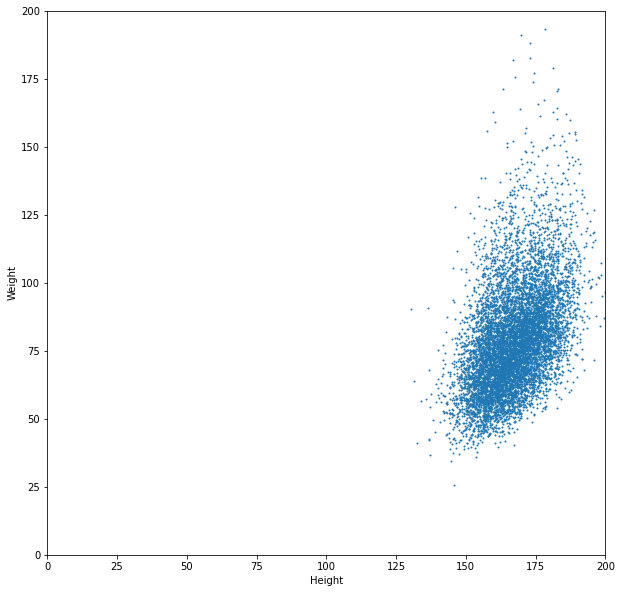

In [5]:
ax = df.plot.scatter(x='Height',y='Weight',s=1,figsize=(10,10))
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)

## Масштабирование данных для признаков "Height" и "Weight"с использованием метода "Mean Normalisation"

In [6]:
hdata = df.loc[:,['Height','Weight']]
print('min(Height) = ' + str(np.min(hdata['Height'])))
print('max(Height) = ' + str(np.max(hdata['Height'])))
print('min(Weight) = ' + str(np.min(hdata['Weight'])))
print('max(Weight) = ' + str(np.max(hdata['Weight'])))

min(Height) = 130.4
max(Height) = 200.1
min(Weight) = 25.6
max(Weight) = 193.3


In [7]:
hdata = hdata.apply(lambda x: (x - np.mean(x))/(np.max(x)-np.min(x)))
hdata.columns = ['Normalized Height','Normalized Weight']
hdata.head()

,Normalized Height,Normalized Weight
0,-0.070705,-0.137747
1,-0.069270,-0.112702
2,-0.064966,0.028621
3,-0.093660,-0.057843
4,-0.112312,-0.035779


<AxesSubplot:>

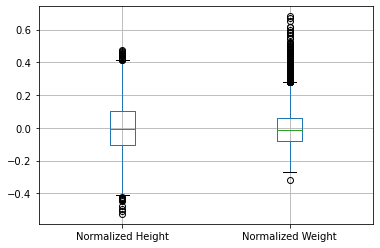

In [8]:
hdata.boxplot(column=['Normalized Height','Normalized Weight'])

## Дополнительные требования по группам

Для пары произвольных колонок данных построить график "Диаграмма рассеяния"

(-0.75, 0.75)

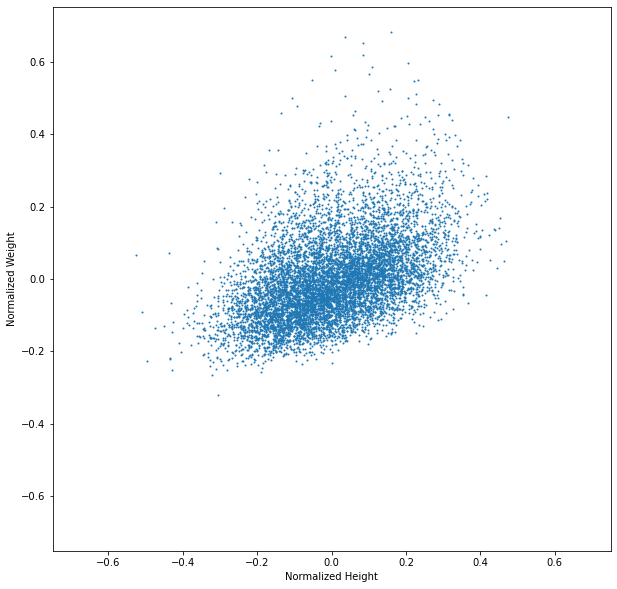

In [9]:
ax = hdata.plot.scatter(x='Normalized Height',y='Normalized Weight',s=1,figsize=(10,10))
ax.set_xlim(-0.75, 0.75)
ax.set_ylim(-0.75, 0.75)